# **LetsGrowMore**
# **TASK 2:Stock Market prediction and forecasting using Stacked LSTM**
# **NAME:MB Hariharan**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
import datetime
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.shape


(2035, 8)

**ANALYZING DATA**

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [8]:
df.isna().any()


Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [9]:
stk=df.copy()

In [10]:
stk.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [11]:
stk['Date']=pd.to_datetime(stk['Date'])

In [12]:
stk['Date'].min()

Timestamp('2010-07-21 00:00:00')

In [13]:
stk['Date'].max()

Timestamp('2018-09-28 00:00:00')

In [14]:
stk['Month Year'] = stk['Date'].apply(lambda x: x.strftime ('%y-%m'))
stk['Year'] = stk['Date'].apply(lambda x: x.strftime ('%y'))
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month Year,Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,18-09,18
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,18-09,18
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,18-09,18
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,18-09,18
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,18-09,18


# **Visualizing the data**

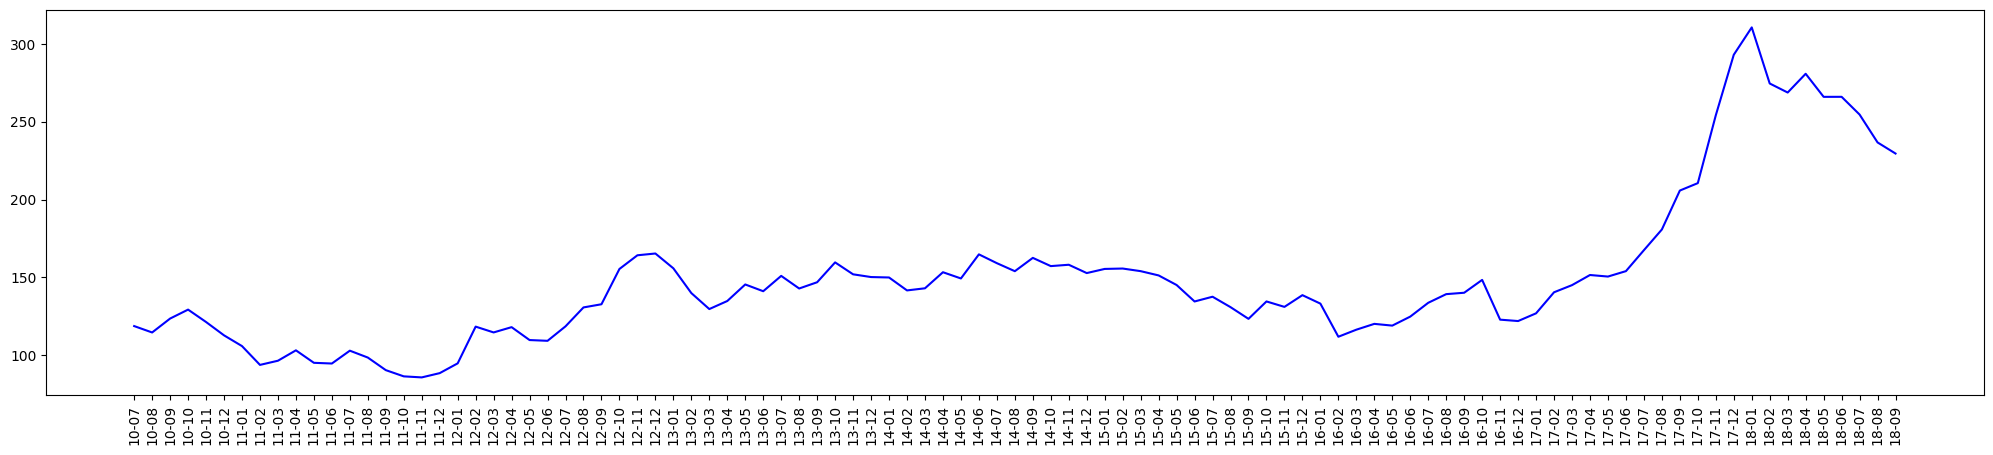

In [15]:
a = stk.groupby('Month Year')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

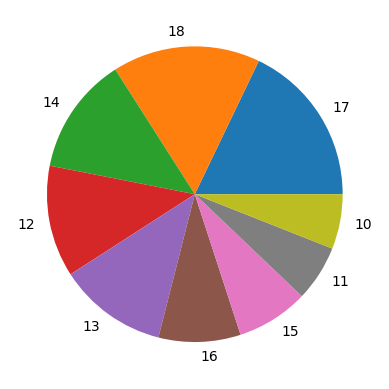

In [16]:
pc = stk[['Year', 'Total Trade Quantity']]
grp_pc = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()
plt.pie(grp_pc['Total Trade Quantity'], labels=grp_pc['Year'])
plt.show()

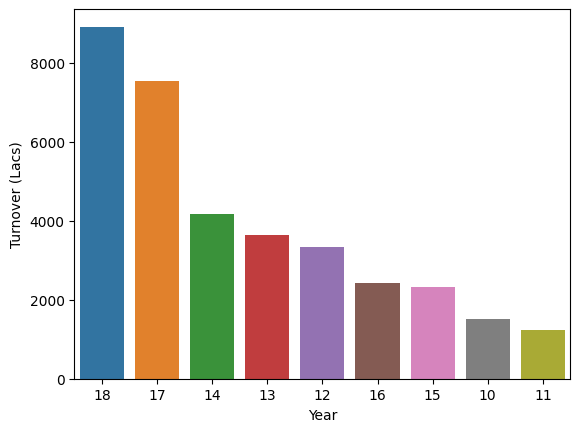

In [18]:
trd = stk[['Year','Turnover (Lacs)']]
a = trd.groupby('Year')['Turnover (Lacs)'].mean().sort_values(ascending = False).reset_index()
sns.barplot(x=a['Year'], y=a['Turnover (Lacs)'])
plt.show()


<Axes: >

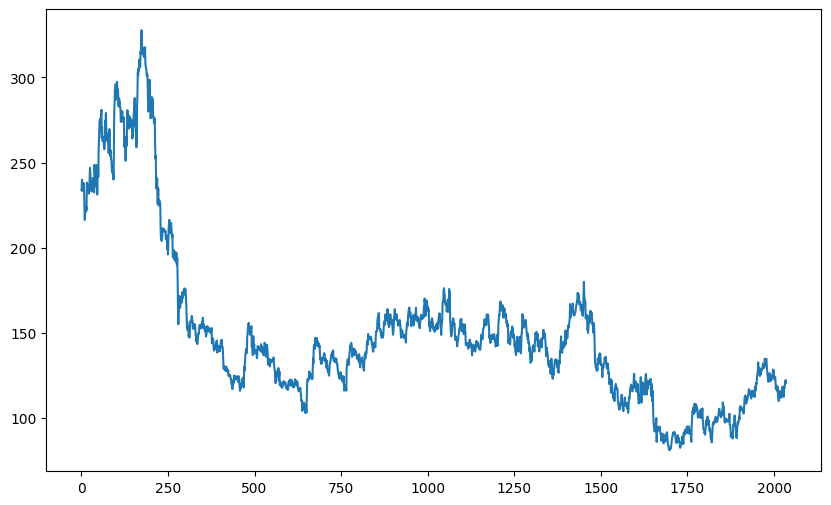

In [19]:
#plotting our data
df['Open'].plot(figsize=(10,6))

In [20]:
#7 days rolling mean of our stock
df.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


<Axes: >

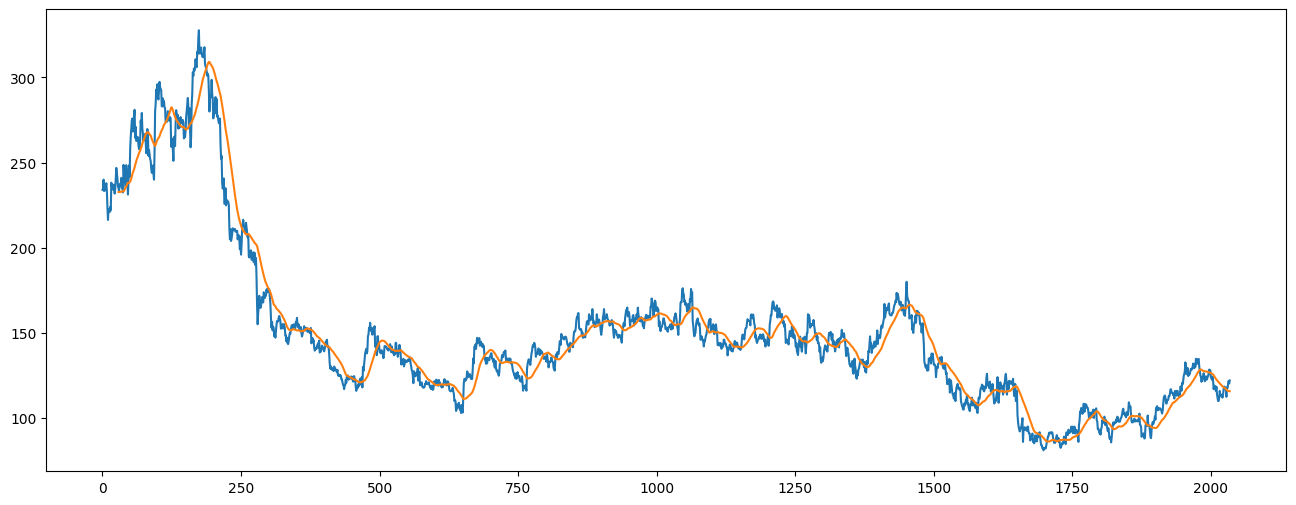

In [21]:
#rolling mean in "orange" and a previous graph in "blue"
#basically gives the moving average of past 30 days
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

<Axes: >

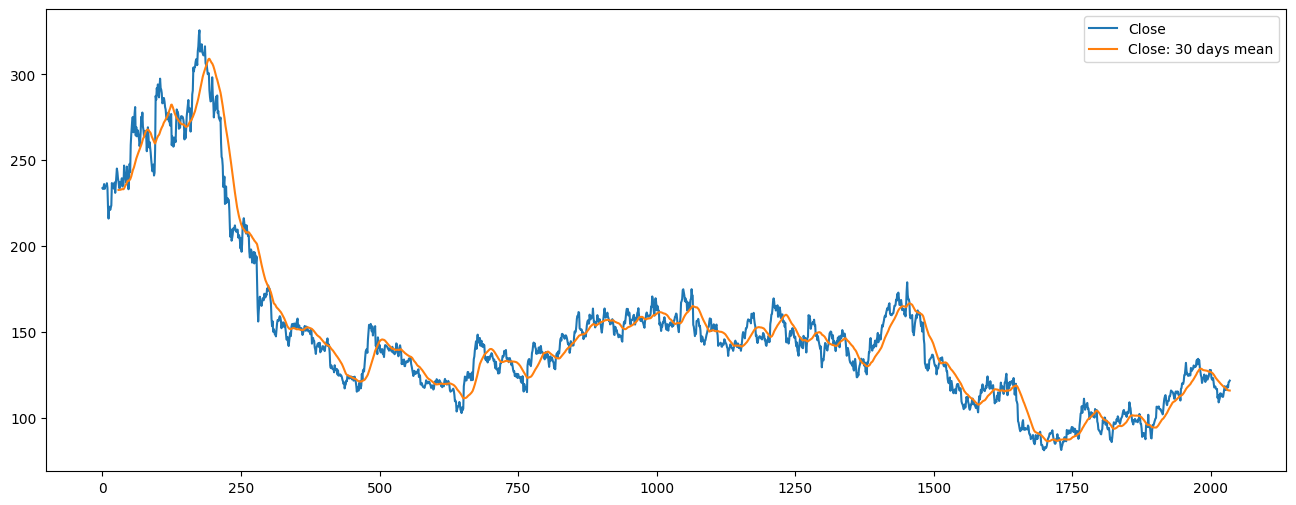

In [24]:
#plot the closed column VS the seven day moving averageof the closed column
df['Close: 30 days mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 days mean']].plot(figsize=(16,6))
#blue line: close price column
#orange line: 30 days rolling mean 

<Axes: >

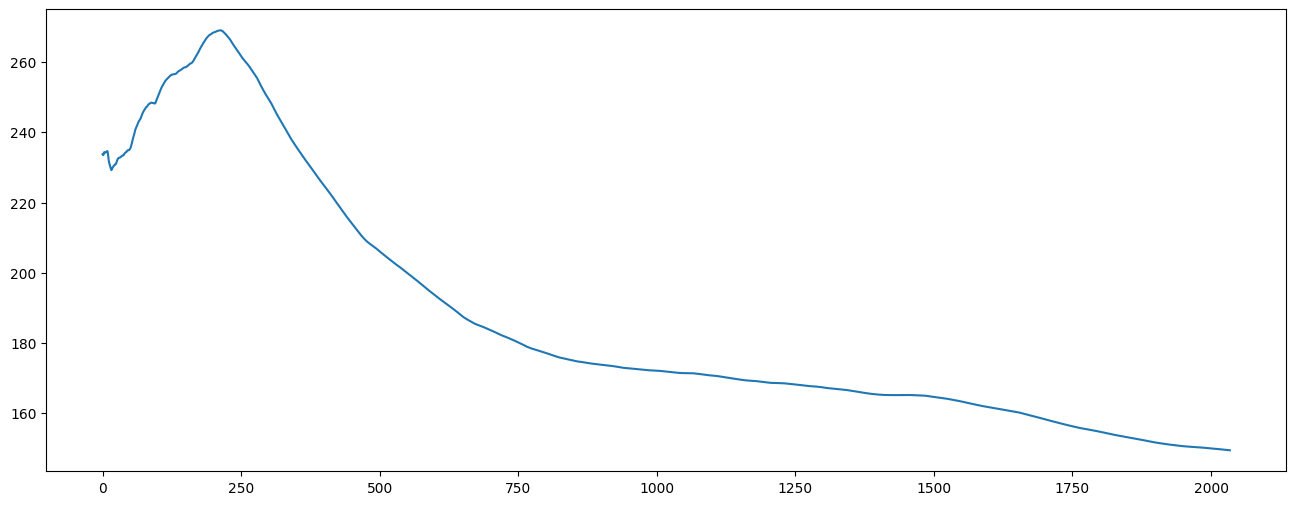

In [26]:
#specify a minimum number of periods
#min no of observation per window which is of 30 days
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [29]:
#first DataFrame : Training set
training_set=df['Open']
training_set=pd.DataFrame(training_set)

In [31]:
#data cleaning
df.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
Close: 30 days mean      True
dtype: bool

In [32]:
#feature scaling from scikit-learn library
#MinMaxScaler: to transform feature by scaling each of them to set range.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [33]:
#creating a DS with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [34]:

#reshaping 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [35]:
#building the RNN
#importing keras libraries
from keras.models import Sequential
from keras.layers import Dense      
from keras.layers import LSTM
from keras.layers import Dropout

In [47]:
#initial the RNN
#for time series data we need regressor 
regressor = Sequential()

In [48]:
#adding the 1st LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#dropout technique used for reducing overfitting in neural networks

#adding the 2nd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#adding the 3rd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#adding the 4th LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units = 1))

In [49]:
#compilling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fitting the RNN to the train test
#epochs= frame of time in machine learning, indicated the number of passes through the entire traing dataset
regressor.fit(X_train,y_train, epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 158ms/step - loss: 0.0188
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0045
Epoch 3/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 4/100
38/38 [==============================] - 10s 259ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 8s 217ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0036
Epoch 7/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0024
Epoch 13/10

In [50]:
#making the prediction and visulising the results

#getting the real stock price
dataset_test = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv", index_col="Date",parse_dates=True)

In [51]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
dataset_test.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [53]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [54]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [55]:

test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2035 non-null   float64
dtypes: float64(1)
memory usage: 31.8 KB


In [56]:
#getting the predicted stock price 
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [57]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


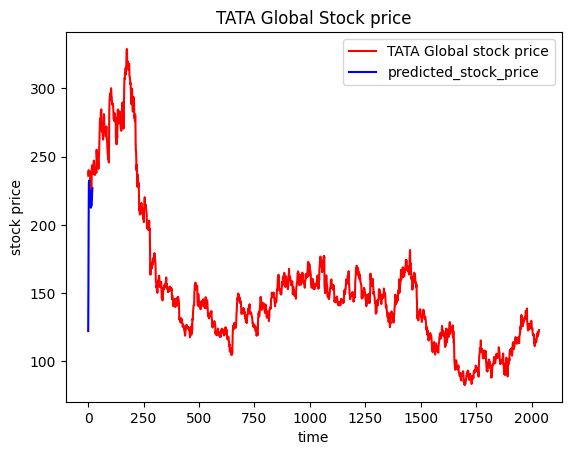

In [58]:
#visulising the data
plt.plot(real_stock_price, color='red',label='TATA Global stock price')
plt.plot(predicted_stock_price, color='blue', label='predicted_stock_price')
plt.title('TATA Global Stock price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()